# Example 5.10

Find the coefficient of consolidation for the test result shown in the figure below

## Data:

Given from consol test

## Principles

$C_v= \cfrac{0.197 H_{dr}^2}{t_{50}}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
consol_data=pd.read_csv('./data/Example_5.10.csv')
consol_data

,S (in),t (min),sqrt t
0,-0.001713,0.000000,0.000000
1,0.003337,0.100000,0.316228
2,0.003679,0.200000,0.447214
3,0.003773,0.233333,0.483046
4,0.003884,0.266667,0.516398
5,0.004083,0.300000,0.547723
6,0.004240,0.366667,0.605530
7,0.004440,0.433333,0.658281
8,0.004792,0.516667,0.718795
9,0.005458,0.616667,0.785281


t_50= 20.77 min


c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


(0.01, 10000.0)

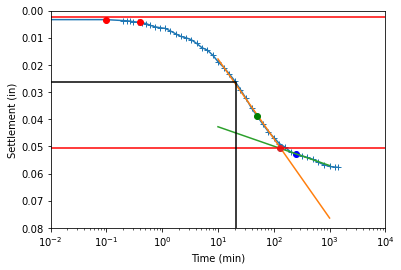

In [49]:
plt.plot(consol_data['t (min)'], consol_data['S (in)'], '-+')
plt.ylim([0.0, 0.08])
plt.xscale('log')
plt.gca().invert_yaxis()
plt.xlabel(r'Time (min)')
plt.ylabel(r'Settlement (in)')

#Select 1 point early in the plot
p1=[consol_data['t (min)'][1], consol_data['S (in)'][1]]
plt.plot(p1[0], p1[1], 'o', color='r')

#Now find point 4t1 
t2=4*p1[0]

s2=np.interp(t2, consol_data['t (min)'], consol_data['S (in)'])

p2=[t2, s2]
plt.plot(p2[0], p2[1], 'o', color='r')

#Find de and e_0

ds=s2-p1[1]

s0=p1[1]-ds

plt.plot([0.01, 1e4], [s0, s0], 'r')


# Find slope
x=consol_data['t (min)'][22:30]
y=consol_data['S (in)'][22:30]

model=np.polyfit(np.log10(x), y, 1)

x1=np.linspace(10,1000, 100)
y2=model[0]*np.log10(x1)+model[1]

plt.plot(x1, y2)

pp=[consol_data['t (min)'][29], consol_data['S (in)'][29]]
plt.plot(pp[0], pp[1], 'o', color='g')


# Second slope
x=consol_data['t (min)'][36:]
y=consol_data['S (in)'][36:]
pp=[consol_data['t (min)'][36], consol_data['S (in)'][36]]
plt.plot(pp[0], pp[1], 'o', color='b')


model=np.polyfit(np.log10(x), y, 1)

x2=np.linspace(10,1000, 100)
y3=model[0]*np.log10(x1)+model[1]

plt.plot(x2, y3)

# Find EOP
idx=np.argwhere(np.diff(np.sign(y3-y2))).flatten()

plt.plot(x1[idx], y2[idx], 'o')

plt.plot([0.01, 1e4], [y2[idx], y2[idx]], 'r')


#Now find t_50

s_50=s0+(y2[idx]-s0)/2

t_50=np.interp(s_50, consol_data['S (in)'], consol_data['t (min)'])

plt.plot([0.01, t_50, t_50], [s_50, s_50, 0.08], 'k')

print('t_50= %1.2f min' % t_50)


plt.xlim([0.01, 1e4])


In [45]:
# finally calculate Cv

Cv=0.5**2 * 0.197 / t_50

print('C_v= %1.2e in^2/min' % Cv)

print('C_v= %1.2f ft^2/yr' % (Cv*60*24*365/(12**2)))

print('C_v= %1.2f m^2/yr' % (Cv*60*24*365*0.0254**2))

C_v= 2.37e-03 in^2/min
C_v= 8.65 ft^2/yr
C_v= 0.80 m^2/yr


# Example 5.12

In [51]:
C_alpha=model[0]

print('C_alpha= %1.3f in' % C_alpha)

C_alpha= 0.007 in
